In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2
os.chdir('C:/PhD/thesis/chapter3/tasroad')

In [2]:
lonmin=146.874820
latmin=-43.307913
lonmax=147.387057
latmax=-42.95820098835541
lat_centre =-43.121608273454754; lon_centre = 147.15917683790045;
gridlen=40

In [3]:
zip1=gpd.read_file('./LIST_TRANSPORT_SEGMENTS_HUON_VALLEY/list_transport_segments_huon_valley.shp')
zip2=gpd.read_file('./LIST_TRANSPORT_SEGMENTS_KINGBOROUGH/list_transport_segments_kingborough.shp')
zips=pd.concat([zip1,zip2])
zips = zips.to_crs('epsg:4326')
#+proj=utm +zone=55 +south +ellps=GRS80 +units=m +no_defs

C:\ProgramData\anaconda3\envs\geo\Lib\site-packages\pyogrio\core.py:35: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()


In [8]:
zips['TRAN_CLASS'].unique()

array(['AS2156 Track Class 4 (PWS)', 'Walking',
       'AS2156 Track Class 2 (PWS)', 'AS2156 Track Class 3 (PWS)',
       'AS2156 Track Class 6 (PWS)', 'Access Road', 'Local Road',
       'Vehicular Track', 'Arterial Road', 'Collector Road',
       'Sub Arterial Road', 'AS2156 Track Class 1 (PWS)', 'Railway',
       'National/State Highway', 'Railway Siding', 'Horse Trail',
       'AS2156 Track Class 5 (PWS)', 'Not Applicable', 'Ferry', 'Bike',
       'Shared Use Track', 'Shared Use Bike/Walking'], dtype=object)

In [24]:
#focus on national highway
subset=zips[zips['TRAN_CLASS'].isin(['National/State Highway', 'Arterial Road', 'Collector Road','Sub Arterial Road',])]

In [25]:
#crop to designated area
subset=subset.cx[lonmin:lonmax,
              latmin:latmax]

<Axes: >

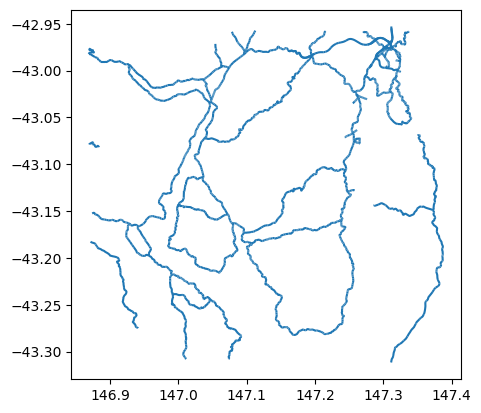

In [26]:
subset.plot()

In [27]:
ax=subset.plot()
ax.set_xlim((lonmin,lonmax))
ax.set_ylim((latmin,latmax))
ax.axis('off')
plt.savefig(f'./roads.png',bbox_inches='tight',
pad_inches=-.05)
plt.clf() 

<Figure size 640x480 with 0 Axes>

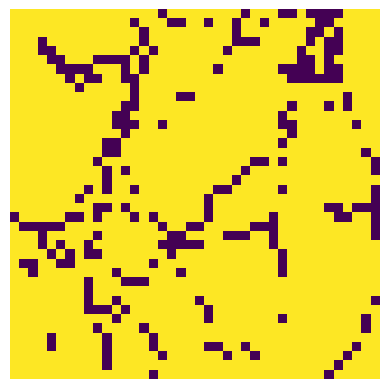

In [28]:
#down scale image
scaled=cv2.imread(f'./roads.png',0)
scaled=cv2.resize(scaled,dsize=(gridlen,gridlen),
   interpolation=cv2.INTER_LANCZOS4)
scaled[scaled<255]=0
plt.imshow(scaled)
plt.axis('off')
plt.show()

In [29]:
import numpy as np

mask=pd.read_csv('C:/PhD/thesis/chapter3/abm/mask.csv',header=None)
matrix=np.array(mask)

In [30]:
matrix[np.where((matrix==0) & (scaled==0))]=128

In [31]:
pd.DataFrame(matrix).to_csv('C:/PhD/thesis/chapter3/abm/road2.csv', header=False, index=False)